In [78]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [109]:
import utide

In [79]:
import pandas as pd
from utide import solve, reconstruct
import matplotlib.pyplot as plt
import numpy as np

In [80]:
dfu = pd.read_csv('../data/ul-boia-completo.csv', delimiter=';')
dfv = pd.read_csv('../data/ul-boia-completo.csv', delimiter=';')

In [81]:
u = dfu.iloc[0:3500, 1]
v = dfv.iloc[0:3500, 1]

In [82]:
dfu.head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,time
0,-5.928774,-2.978601,-3.320634,-3.470345,-2.958156,-4.705866,-4.566947,-4.462758,-4.844342,-4.948923e+00,...,-5.173874,-5.409318,-5.760821,-6.081331,-6.413693,-5.555062,-8.241056,-10.291037,-11.737973,2016-11-18 20:00:00
1,-11.402727,-8.750596,-6.980657,-8.503150,-7.380865,-6.373020,-6.549218,-7.249262,-5.218583,-6.987684e+00,...,-7.513953,-8.413696,-6.891079,-5.694019,-7.456039,-4.235960,-3.785530,4.594848,16.173534,2016-11-18 21:00:00
2,0.595127,-0.638758,-1.915496,-1.245912,-1.789890,-0.588146,0.605599,-1.165643,-1.095844,3.552714e-15,...,0.000000,1.777977,0.326360,0.715440,4.220607,3.949746,5.871076,7.969069,22.089146,2016-11-18 22:00:00


In [83]:
time = dfu.time.iloc[:3500]
time = pd.to_datetime(time)

In [84]:
u.isna().sum(), v.isna().sum()

(151, 151)

In [85]:
u.interpolate(method='linear', limit=12, inplace=True)
v.interpolate(method='linear', limit=12, inplace=True)

### Creataing a white noise

In [125]:
n = len(time) # comprimento
amp = 0.001 # amplitude
phase = np.pi/4 # fase em radianos
t = 500 # horas
t2 = 800 #
white_noise = [amp + np.sin((i*np.pi/2)/t) for i in range(n)]
white_noise2 = [amp + np.sin((i*np.pi/2)/t2 + phase) for i in range(n)]

white_noise = np.array(white_noise)
white_noise2 = np.array(white_noise2)

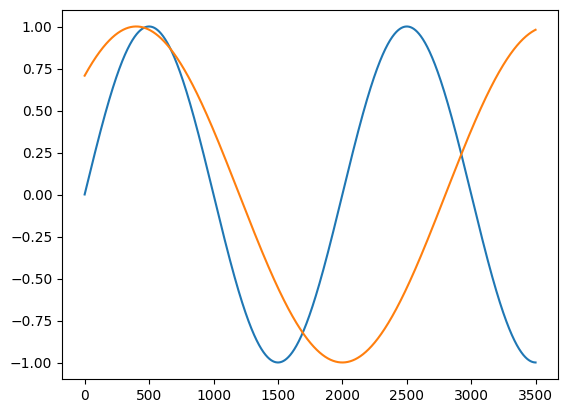

In [126]:
plt.plot(white_noise)
plt.plot(white_noise2)

In [88]:
def add_noise(vector, noise) -> np.asarray:
    from numpy import isnan
    vector[isnan(vector)] = 0
    vector = vector + noise
    return vector

In [95]:
u, v = add_noise(u, white_noise), add_noise(v, white_noise2)
u.isna().sum(), v.isna().sum()

(0, 0)

In [96]:
# computing current as a complex vector
c = v + u*1j

In [97]:
#from utide import solve
coef = solve(time, v, u,
             lat=-3,
             nodal=False,
             trend=False,
             method='robust',
             conf_int='linear',
             Rayleigh_min=0.95,)

solve: matrix prep ... solution ... done.


In [118]:
coef.keys()

dict_keys(['name', 'aux', 'nR', 'nNR', 'nI', 'rf', 'weights', 'Lsmaj', 'Lsmin', 'theta', 'g', 'umean', 'vmean', 'g_ci', 'Lsmaj_ci', 'Lsmin_ci', 'theta_ci', 'diagn', 'PE', 'SNR'])

In [121]:
#help(coef.weights)

In [ ]:
#coef.PE

In [100]:
text = coef.diagn

In [101]:
print(pd.DataFrame(text))

    name         PE          SNR
0     M2  78.336613  3138.516887
1     S2   7.384869   296.206550
2     MM   5.424804    52.353820
3     N2   2.899374   116.103802
4     K1   1.640182    65.606465
5    NO1   0.936448    37.446052
6    MU2   0.333296    13.352294
7    MSF   0.325960     3.147355
8   ALP1   0.275417    11.042659
9    MK3   0.246569    13.529394
10  2SK5   0.244996    15.096064
11   2Q1   0.218783     8.753890
12   SN4   0.207465    12.363323
13    Q1   0.181962     7.281515
14    M4   0.177138    10.554409
15   MN4   0.152238     9.092535
16    M3   0.117108     6.416392
17    O1   0.105946     4.236936
18   OO1   0.105146     4.206930
19    J1   0.092238     3.688828
20  ETA2   0.091419     3.671498
21  2MN6   0.089624     5.590345
22    S4   0.082530     4.940460
23   MS4   0.064637     3.860019
24   MO3   0.060178     3.302279
25  UPS1   0.058243     2.334699
26    M6   0.041310     2.575836
27  EPS2   0.034169     1.371259
28  2MS6   0.018347     1.146672
29    L2  

In [ ]:
coef.keys()

In [114]:
#help(utide._ut_constants)

In [77]:
help(solve)

Help on function solve in module utide._solve:

solve(t, u, v=None, lat=None, **opts)
    Calculate amplitude, phase, confidence intervals of tidal constituents.
    
    Parameters
    ----------
    t : array_like
        Time in days since `epoch`, or np.datetime64 array, or pandas datetime array.
    u : array_like
        Sea-surface height, velocity component, etc.
    v : {None, array_like}, optional
        If `u` is a velocity component, `v` is the orthogonal component.
    lat : float, required
        Latitude in degrees.
    epoch : {string, `datetime.date`, `datetime.datetime`}, if datenum is provided in t.
        Default `None` if `t` is `datetime`, `np.datetime64`, or `pd.datetime array.`
        Optional valid strings are
            - 'python' : if `t` is days since '0000-12-31'
            - 'matlab' : if `t` is days since '0000-00-00'
        Or, an arbitrary date in the form 'YYYY-MM-DD'.
    constit : {'auto', sequence}, optional
        List of strings with stand

In [122]:
#help(coef)